In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# Making the plot automately displayed below the cell without plt.show()
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('~/Housing_prediction/bengaluru_house_prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [5]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [7]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [8]:
df.society.unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


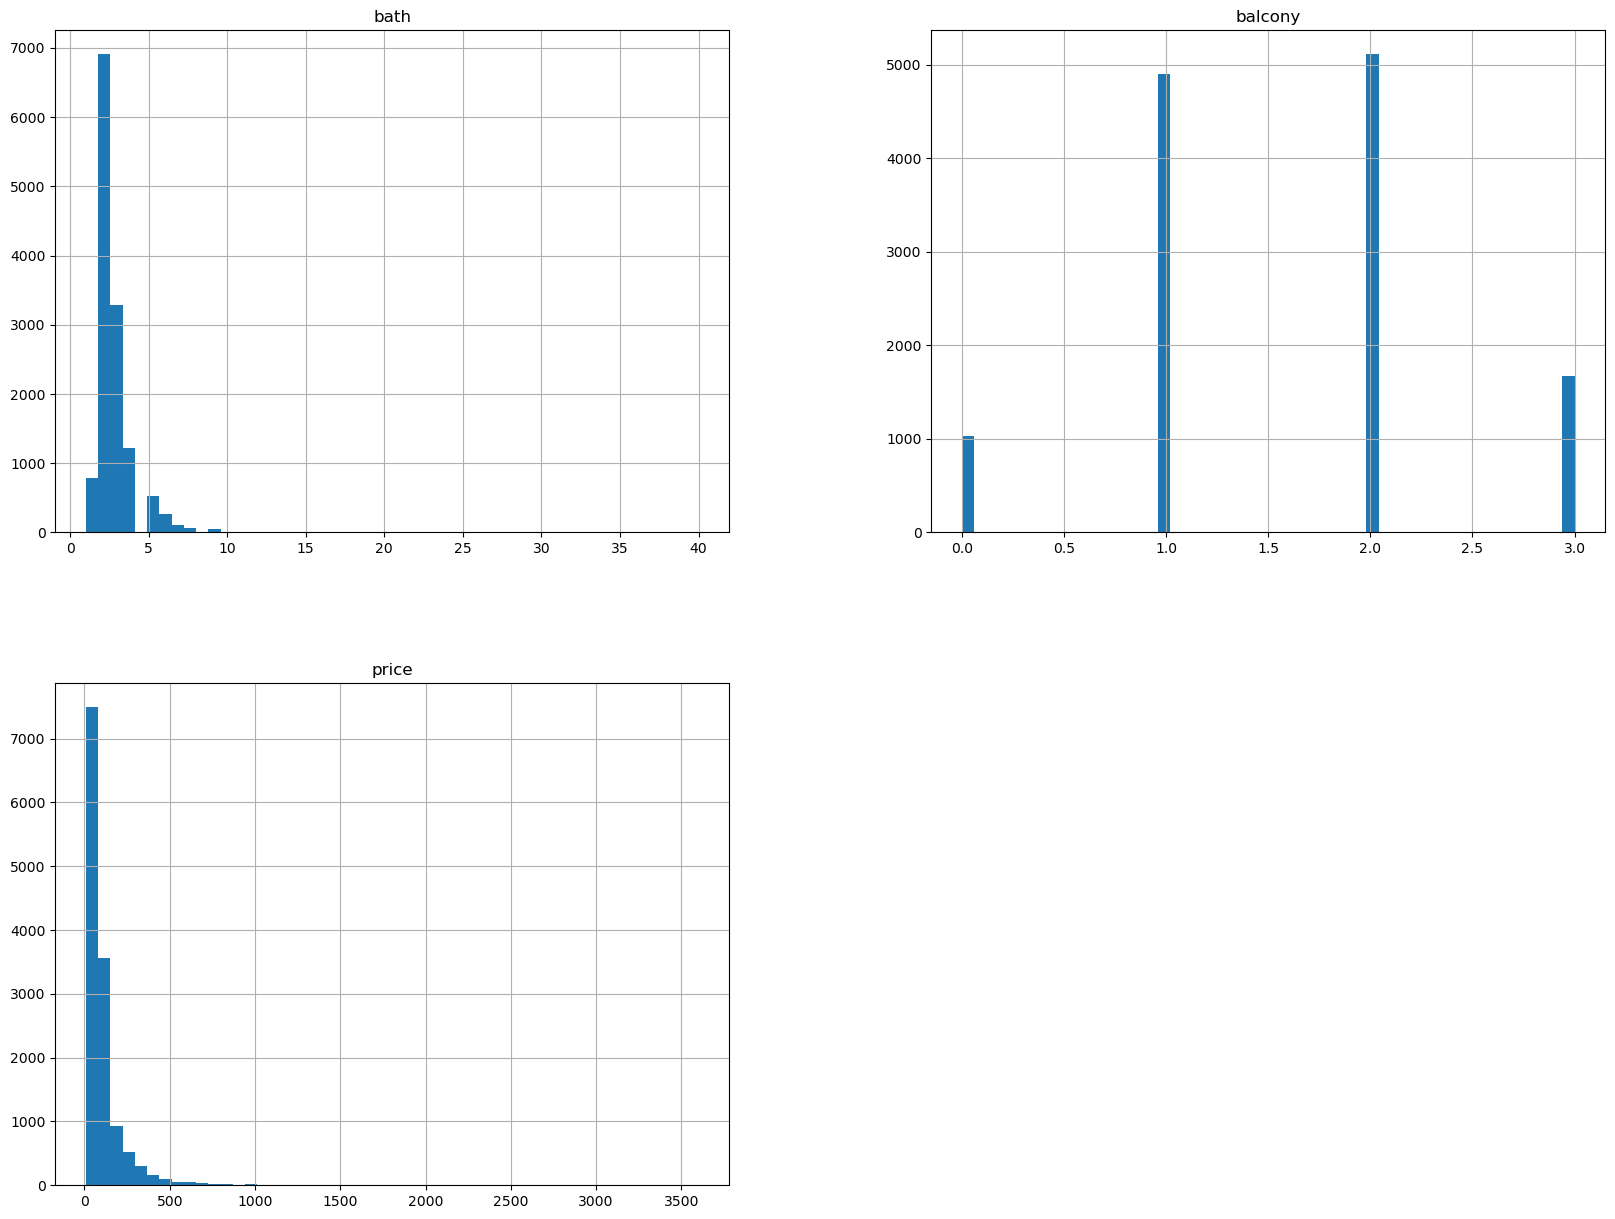

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
df.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


Text(0, 0.5, 'Price')

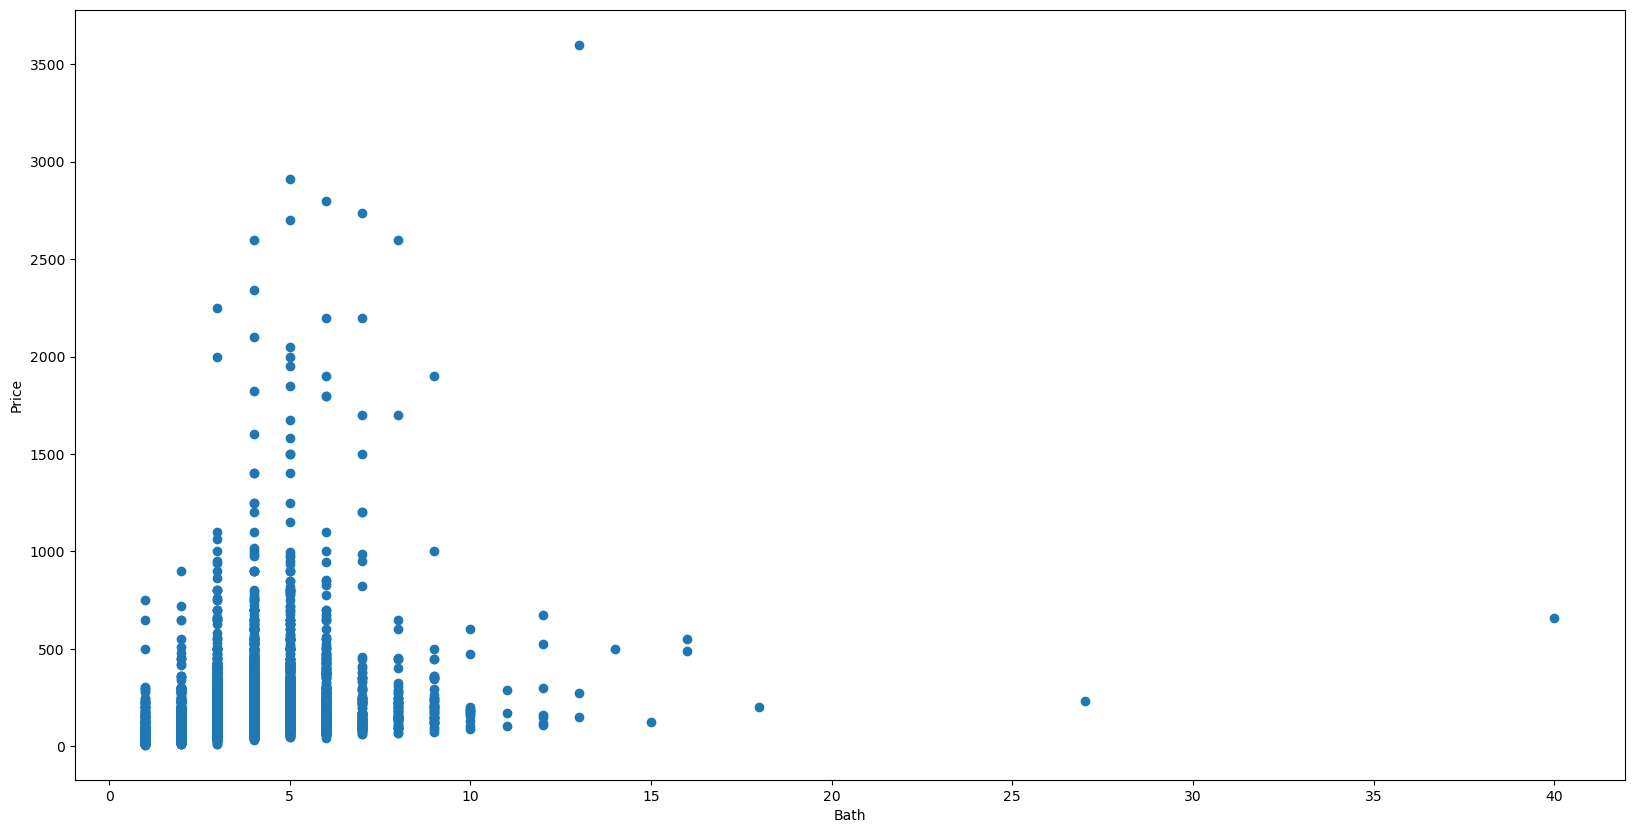

In [12]:
plt.scatter(df.bath, df.price)
plt.xlabel('Bath')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

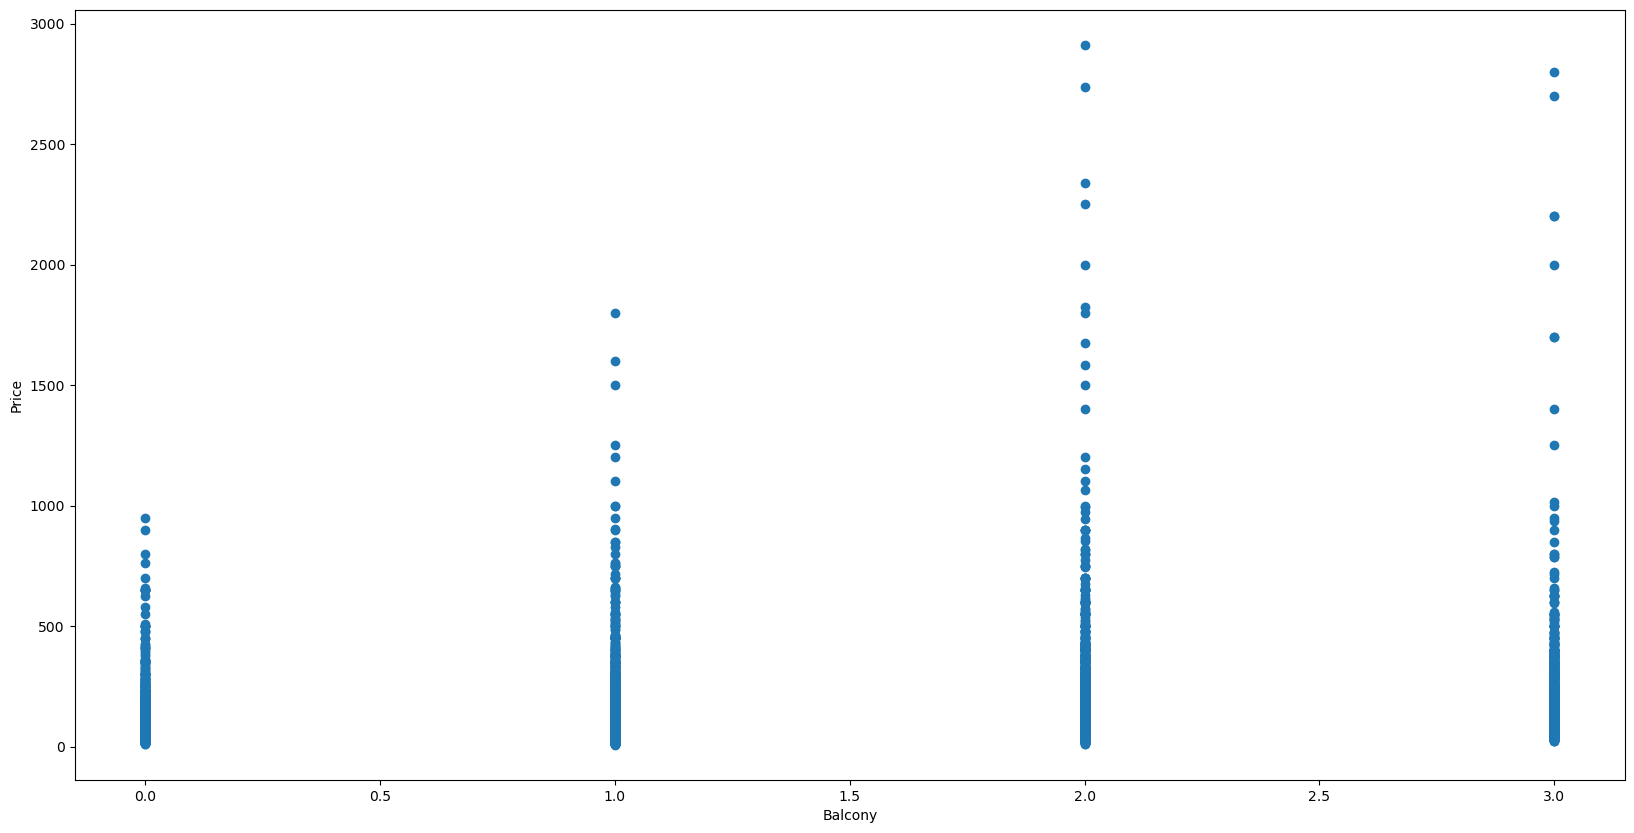

In [13]:
plt.scatter(df.balcony, df.price)
plt.xlabel('Balcony')
plt.ylabel('Price')

In [14]:
# Drop unecessary columns
df1 = df.drop(['area_type', 'society', 'availability'], axis = 1)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [15]:
# Checking null values
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [16]:
# Drop the missing values since the amount of it is too small
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [17]:
df2.shape
# The number of row decreases by 76 rows

(12710, 6)

In [18]:
# Checking the values of a specific column
df2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [19]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [21]:
df2['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [22]:
# Processing the 'size' column so it can have the same format values
## 'float' object has no attribute 'split' => Change it from float to int
df3 = df2.copy()
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [23]:
df3.describe()

,bath,balcony,price,BHK
count,12710.000000,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778,2.737136
std,1.226000,0.817287,131.766089,1.205097
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,49.030000,2.000000
50%,2.000000,2.000000,70.000000,3.000000
75%,3.000000,2.000000,115.000000,3.000000
max,40.000000,3.000000,2912.000000,43.000000


array([[<Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'balcony'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'BHK'}>]], dtype=object)

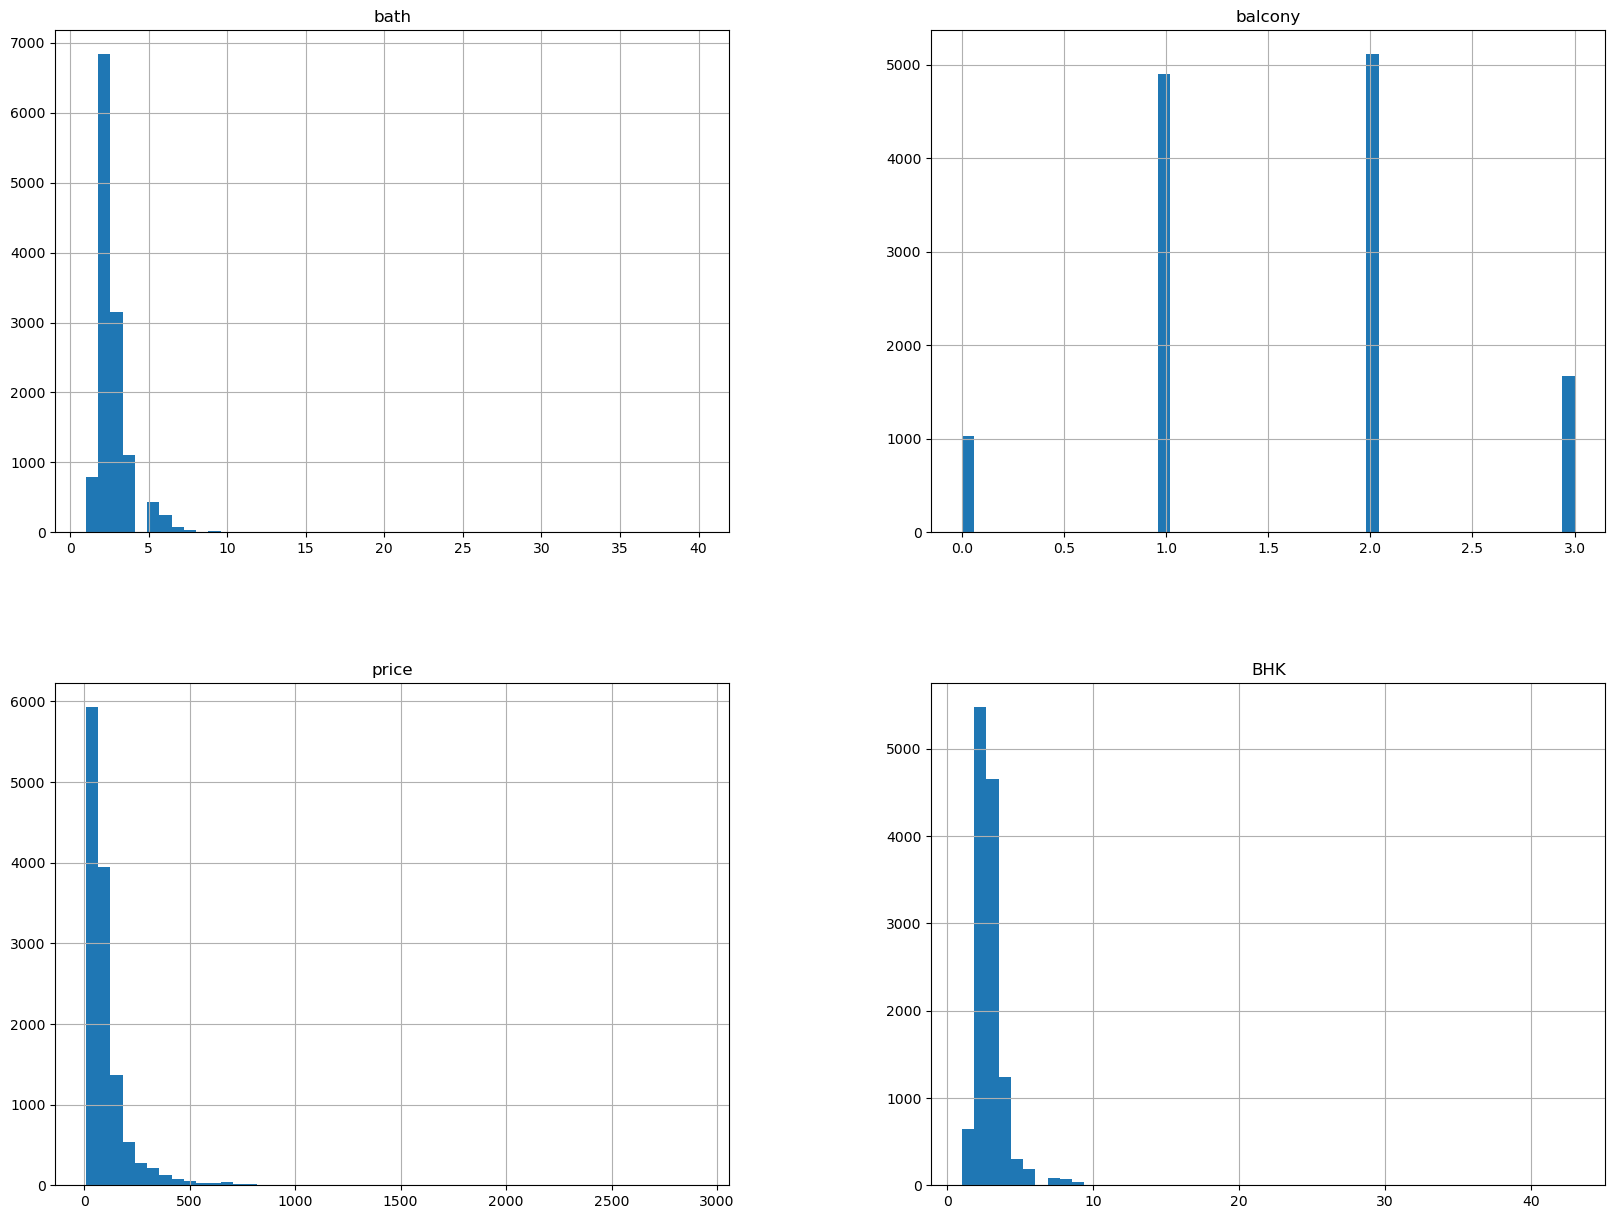

In [65]:
df3.hist(bins=50, figsize=(20,15))

In [25]:
df3.corr()

,bath,balcony,price,BHK
bath,1.000000,0.204191,0.459736,0.887816
balcony,0.204191,1.000000,0.120363,0.187285
price,0.459736,0.120363,1.000000,0.406979
BHK,0.887816,0.187285,0.406979,1.000000


In [26]:
df3 = df3.drop(['size'], axis = 1)
df3.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [27]:
df3['BHK'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [28]:
# Processing the "1133 - 1384" format in 'total_sqft' column
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [29]:
df3[~df3['total_sqft'].apply(is_float)].head(10) # row 410, 648

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,1160 - 1195,2.0,0.0,59.935,2


In [30]:
## Define a function converting 'x - x' format to float

def convert_sqft_to_num(x):
    tokens = x.split(' - ')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        float(x)
        return x
    except:
        return None
convert_sqft_to_num('2100 - 2850')

2475.0

In [31]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [32]:
# Checking the 30th row of the data (total_sqft = 2100 - 2850)
df4.loc[188]

location      KR Puram
total_sqft      1277.5
bath               2.0
balcony            0.0
price             56.8
BHK                  2
Name: 188, dtype: object

In [33]:
# Insert and calculate a column named 'price_per_sqft' for more insight
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / (df5['total_sqft'].astype(float))
df5

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4,10407.336319


In [34]:
location_stats = df5.groupby('location')['location'].agg('count')
location_stats

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
singapura paradise      1
t.c palya               1
tc.palya                4
vinayakanagar           1
whitefiled              1
Name: location, Length: 1265, dtype: int64

In [35]:
# Removing outliers
def remove_outliers(df):
    df_result = pd.DataFrame()
    for key, subdf in df6.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-std)) & (subdf.price_per_sqft <= (m+std))]
        # Chosen threshold for the outlier: m+std, m-std
        df_result = pd.concat([df_result, reduced_df], ignore_index = True)
    return df_result

In [36]:
df6 = df5.copy()
df6 = remove_outliers(df5)
df6.shape

(9515, 7)

In [37]:
# As a data scientist when you have a conversation with your business manager (who has expertise in real estate)
# he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for
# example 400 sqft apartment with 2 bhk than that seems suspicious and
# can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [38]:
df6[df6.total_sqft.astype(float)/df6.BHK<300].head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
26,1st Block HRBR Layout,1200,7.0,0.0,235.0,8,19583.333333
28,1st Block HRBR Layout,600,3.0,1.0,90.0,3,15000.000000
29,1st Block HRBR Layout,600,3.0,2.0,125.0,3,20833.333333
30,1st Block HRBR Layout,600,4.0,2.0,125.0,3,20833.333333
33,1st Block Jayanagar,1200,6.0,2.0,125.0,6,10416.666667


In [39]:
df7 = df6.copy()
df7 = df7[~(df7.total_sqft.astype(float)/df7.BHK<300)]
df7.shape

(9286, 7)

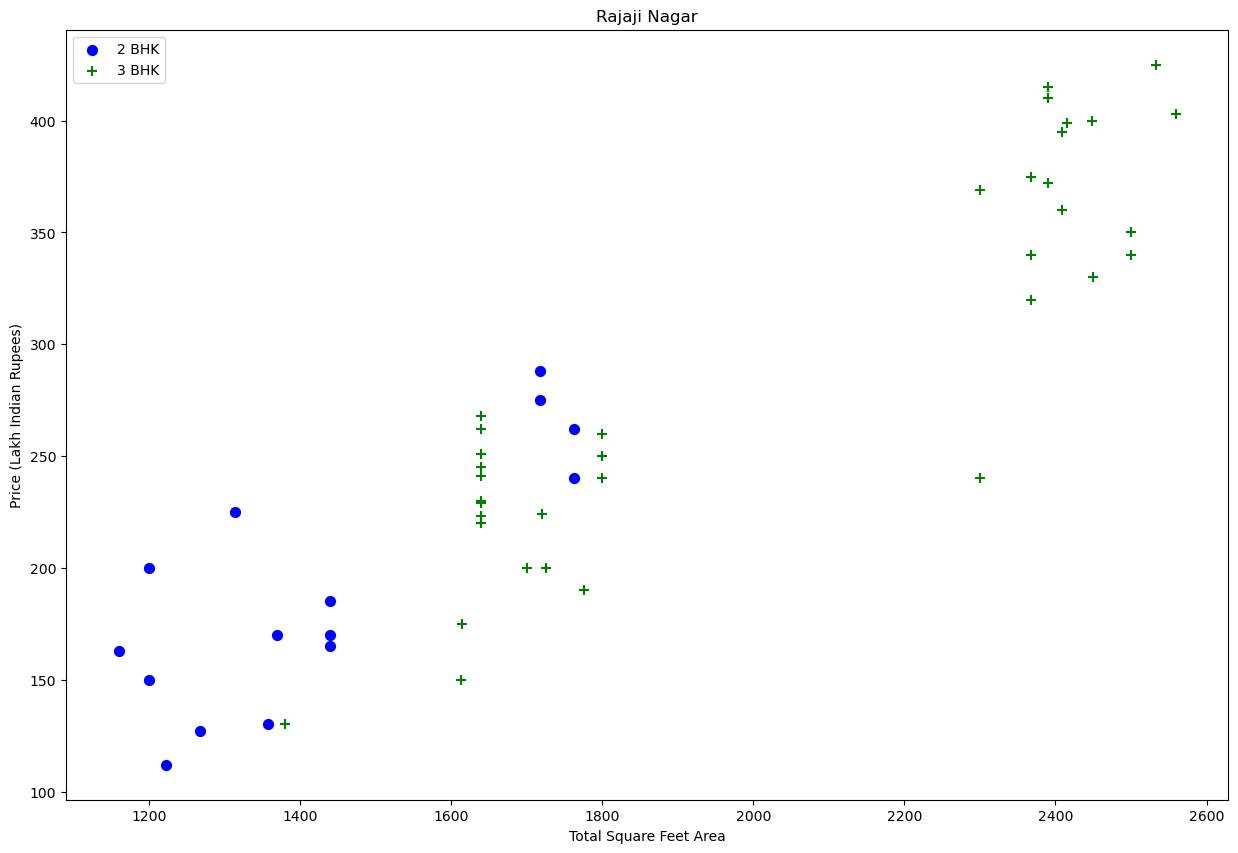

In [40]:
def plot_scatter_chart(df,location):
    br2 = df[(df.location==location) & (df.BHK==2)]
    br3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(br2.total_sqft.astype(float),br2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(br3.total_sqft.astype(float),br3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

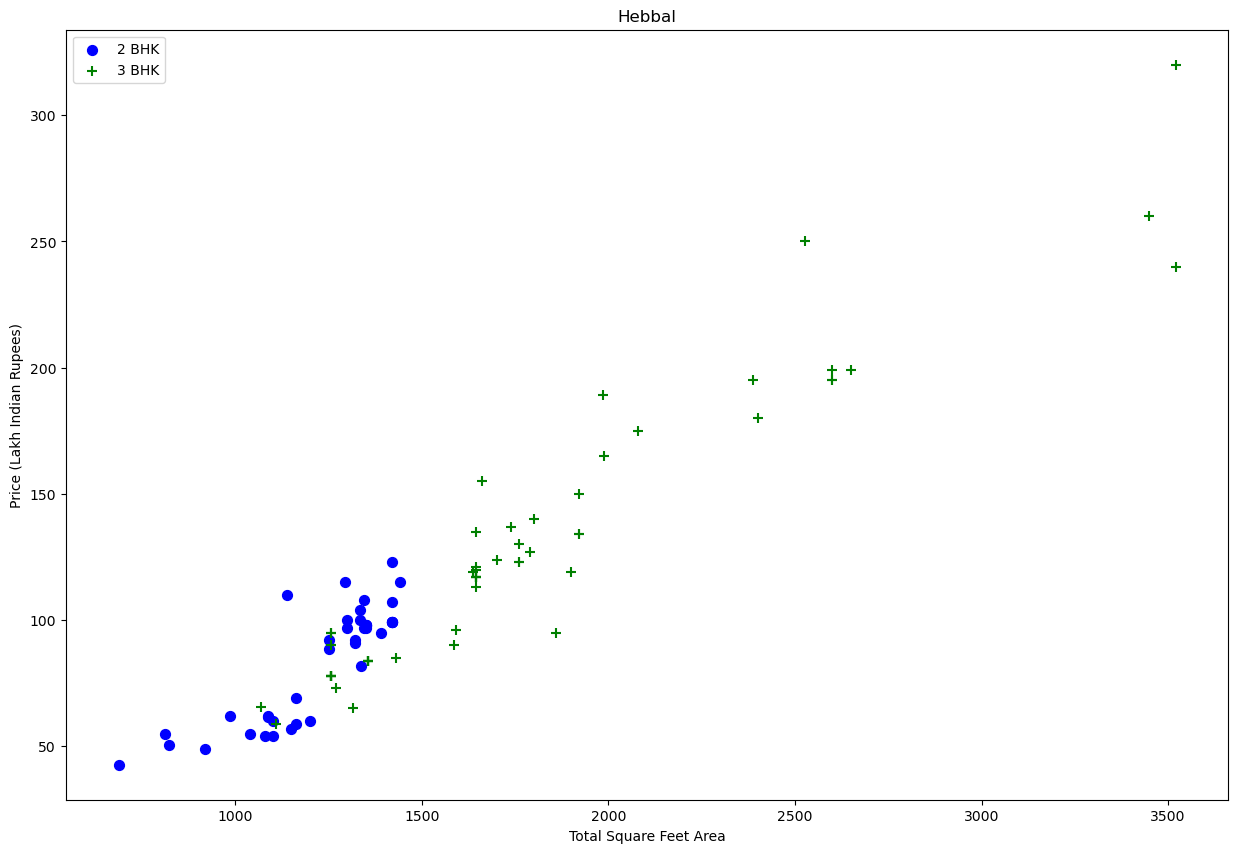

In [41]:
plot_scatter_chart(df7,"Hebbal")

In [42]:
# Now we can remove those 2 bedrooms apartments whose price_per_sqft is less than mean price_per_sqft of 1 bedroom apartment
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_stats = {}
        for bedroom, bedroom_df in location_df.groupby('BHK'):
            bedroom_stats[bedroom] = {
                'mean': np.mean(bedroom_df.price_per_sqft),
                'std': np.std(bedroom_df.price_per_sqft),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby('BHK'):
            stats = bedroom_stats.get(bedroom-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bedroom_outliers(df7)
# df8 = df7.copy()
df8.shape

(7507, 7)

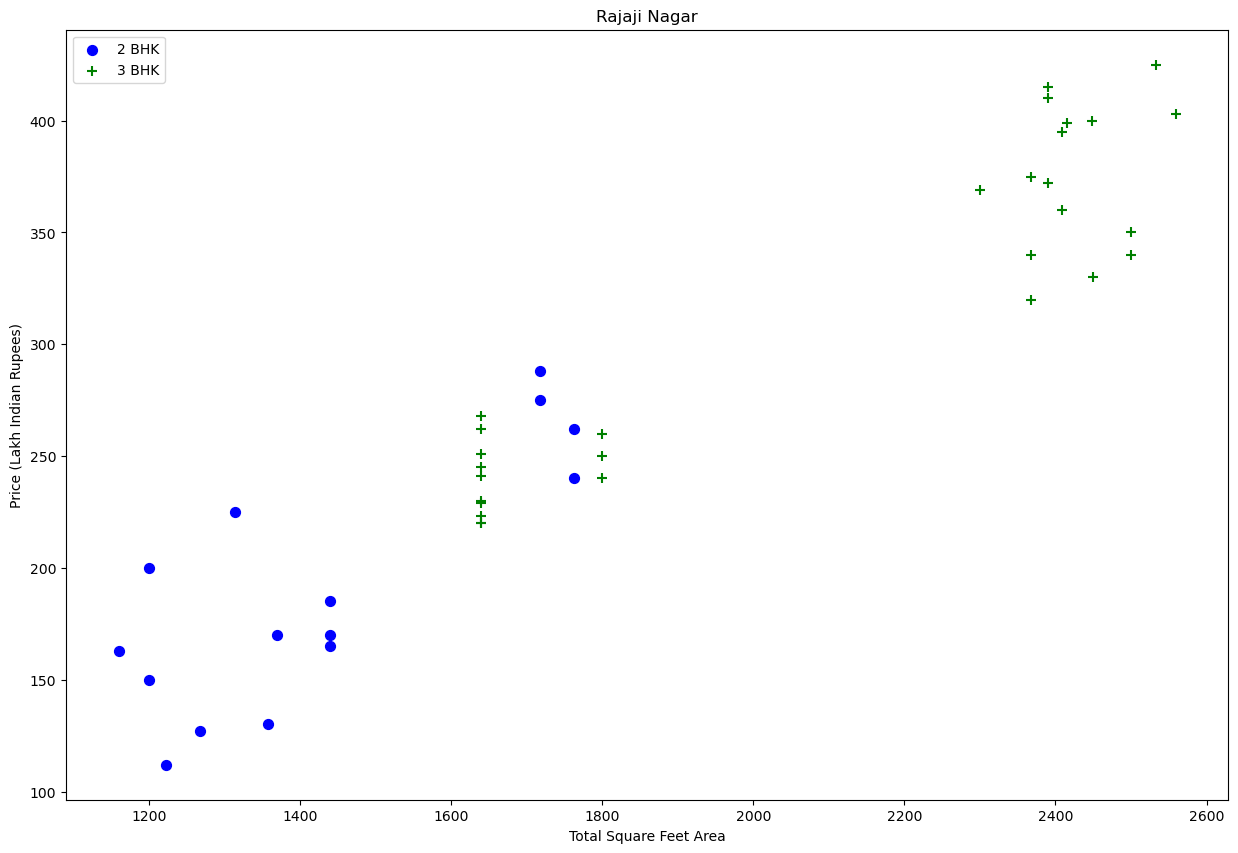

In [43]:
plot_scatter_chart(df8,"Rajaji Nagar")

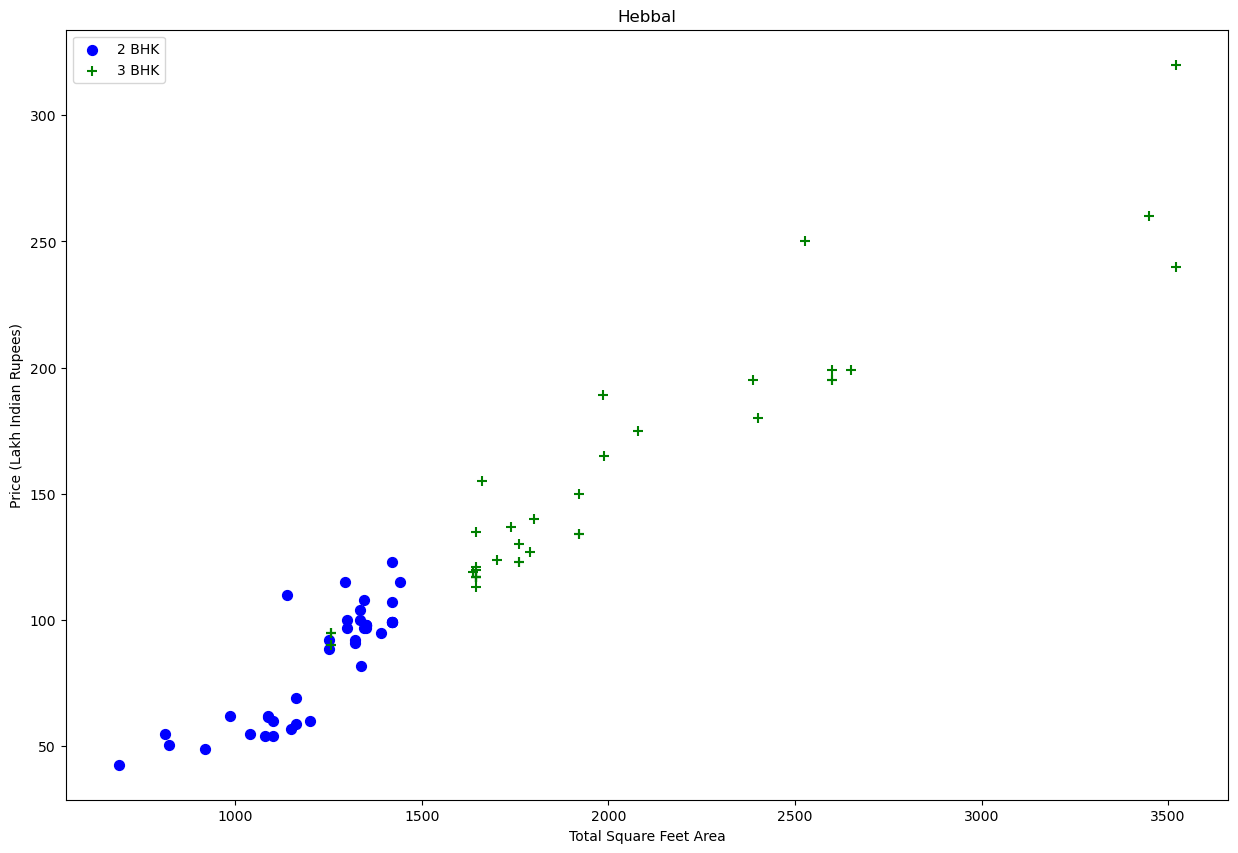

In [44]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

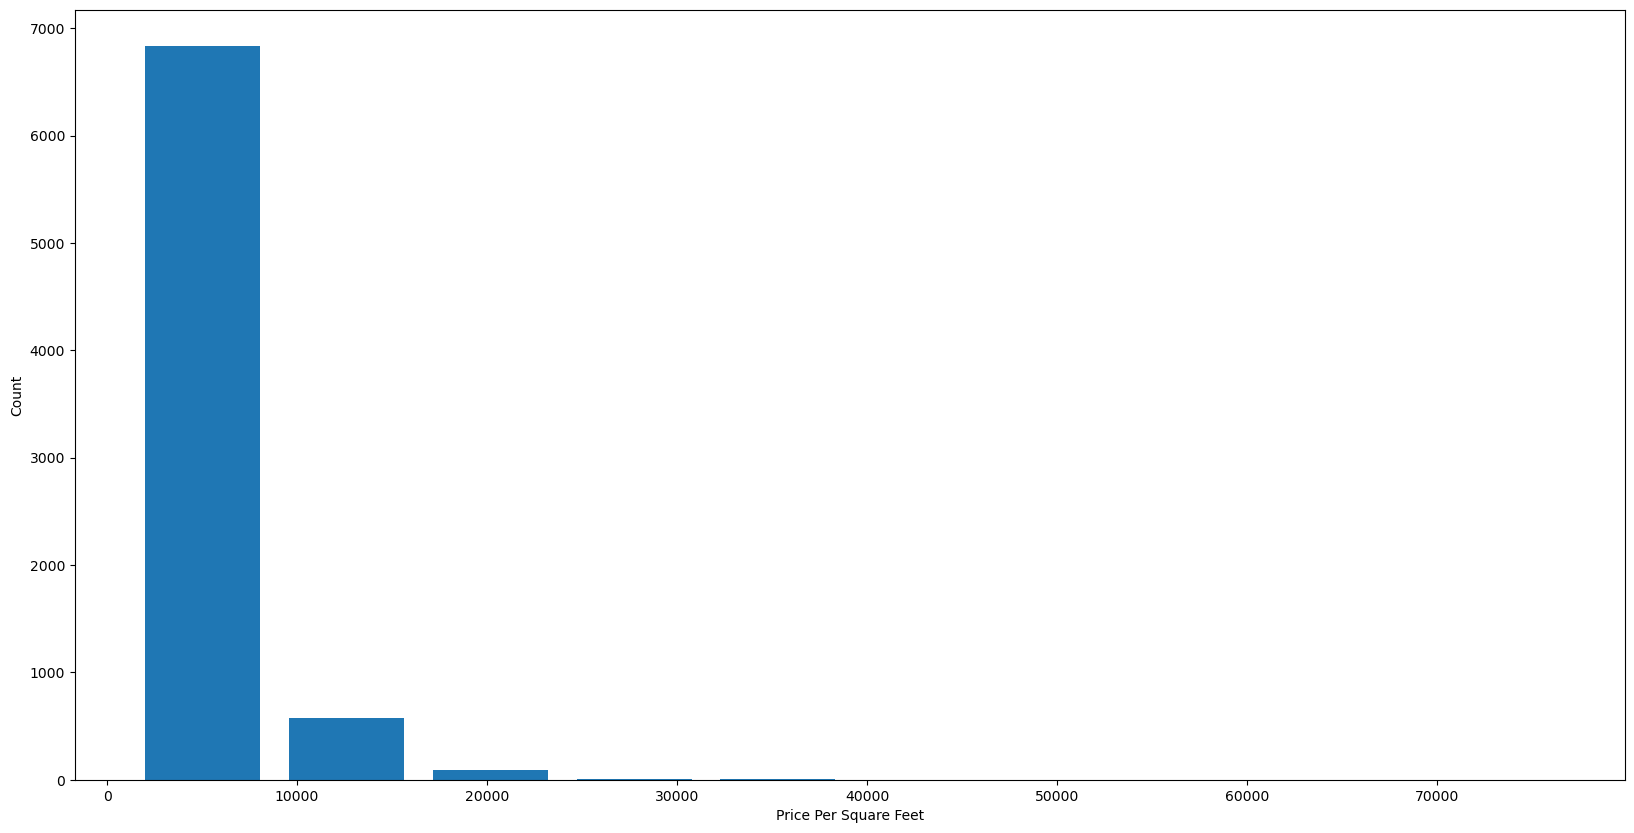

In [45]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [46]:
# Outlier Removal Using Bathrooms Feature
# It is unusual to have 2 more bathrooms than number of BHK in a home
df8[df8.bath>df8.BHK+2]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
2019,Chikkabanavar,2460,7.0,2.0,80.0,4,3252.032520
7559,Sathya Sai Layout,11338,9.0,1.0,1000.0,6,8819.897689
8068,Thanisandra,1806,6.0,2.0,116.0,3,6423.034330


In [47]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(7435, 7)

In [48]:
# Model Building
df9

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Devarabeesana Halli,1672,3.0,2.0,150.00,3,8971.291866
1,Devarabeesana Halli,1750,3.0,3.0,149.00,3,8514.285714
2,Devarabeesana Halli,1750,3.0,2.0,150.00,3,8571.428571
4,Devarachikkanahalli,1250,2.0,2.0,40.00,2,3200.000000
5,Devarachikkanahalli,1200,2.0,2.0,83.00,2,6916.666667
...,...,...,...,...,...,...,...
9510,frazertown,2900,3.0,2.0,325.00,3,11206.896552
9511,manyata park,1780,3.0,1.0,84.83,3,4765.730337
9512,tc.palya,880,2.0,1.0,48.00,2,5454.545455
9513,tc.palya,1000,2.0,1.0,55.00,2,5500.000000


In [49]:
df10 = df9.drop(['price_per_sqft'], axis = 1)
df10

,location,total_sqft,bath,balcony,price,BHK
0,Devarabeesana Halli,1672,3.0,2.0,150.00,3
1,Devarabeesana Halli,1750,3.0,3.0,149.00,3
2,Devarabeesana Halli,1750,3.0,2.0,150.00,3
4,Devarachikkanahalli,1250,2.0,2.0,40.00,2
5,Devarachikkanahalli,1200,2.0,2.0,83.00,2
...,...,...,...,...,...,...
9510,frazertown,2900,3.0,2.0,325.00,3
9511,manyata park,1780,3.0,1.0,84.83,3
9512,tc.palya,880,2.0,1.0,48.00,2
9513,tc.palya,1000,2.0,1.0,55.00,2


In [50]:
# Should we group the location ?? => Yes -> get_dummies

In [51]:
# Processing the 'location' column
df10.location = df10.location.apply(lambda x: x.strip())

In [52]:
location_stats = df10.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               273
Sarjapur  Road           173
Electronic City          162
Raja Rajeshwari Nagar    138
Uttarahalli              126
                        ... 
Phase 1 Kammasandra        1
Cottonpet                  1
Postal Colony              1
Cleveland Town             1
1st Block BEL Layout       1
Name: location, Length: 759, dtype: int64

In [53]:
location_less_than_10 = location_stats[location_stats < 10]
print(len(location_less_than_10))

579


In [54]:
df10.location = df10.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df10.location.unique())

181

In [55]:
# OneHotEncoder
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Varthur,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df10 = pd.concat([df10, dummies.drop('other', axis = 1)], axis = 1)
df10.head()

,location,total_sqft,bath,balcony,price,BHK,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Uttarahalli,Varthur,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,other,1672,3.0,2.0,150.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,other,1750,3.0,3.0,149.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,other,1750,3.0,2.0,150.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1250,2.0,2.0,40.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,1200,2.0,2.0,83.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df11 = df10.drop(['location'], axis = 1)
df11

,total_sqft,bath,balcony,price,BHK,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Uttarahalli,Varthur,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1672,3.0,2.0,150.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750,3.0,3.0,149.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750,3.0,2.0,150.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250,2.0,2.0,40.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200,2.0,2.0,83.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,2900,3.0,2.0,325.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9511,1780,3.0,1.0,84.83,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9512,880,2.0,1.0,48.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9513,1000,2.0,1.0,55.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.preprocessing import StandardScaler

X_before = df11.drop(['price'], axis = 1)
y = df11.price
scaler = StandardScaler()
X = scaler.fit_transform(X_before)

In [59]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.8021161484394814

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.744827  , 0.65694002, 0.52830523, 0.61049057, 0.67736256])

In [62]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.643585,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.636268,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.242003,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [63]:
from keras.models import Sequential
from keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# evaluate the model
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error: ', mse)

Epoch 1/100
140/140 [==============================] - 1s 2ms/step - loss: 14969.8359 - val_loss: 8953.2129
Epoch 2/100
140/140 [==============================] - 0s 1ms/step - loss: 6563.6235 - val_loss: 5149.4102
Epoch 3/100
140/140 [==============================] - 0s 1ms/step - loss: 5315.7173 - val_loss: 4402.2476
Epoch 4/100
140/140 [==============================] - 0s 1ms/step - loss: 4827.6445 - val_loss: 3797.2476
Epoch 5/100
140/140 [==============================] - 0s 1ms/step - loss: 4497.9062 - val_loss: 3560.6606
Epoch 6/100
140/140 [==============================] - 0s 1ms/step - loss: 4303.4980 - val_loss: 3365.0247
Epoch 7/100
140/140 [==============================] - 0s 1ms/step - loss: 4091.7849 - val_loss: 3238.2566
Epoch 8/100
140/140 [==============================] - 0s 1ms/step - loss: 3926.9580 - val_loss: 3123.0618
Epoch 9/100
140/140 [==============================] - 0s 1ms/step - loss: 3746.0171 - val_loss: 3194.2539
Epoch 10/100
140/140 [==============

In [64]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

Root Mean Squared Error:  40.973993752897705
